--- Dados Originais ---


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


--- Dados Sujos (Linhas com Nulos) ---


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

--- Dados Após preencher Idade com Média ---


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C



--- Taxa de Sobrevivência por Sexo (%) ---


Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

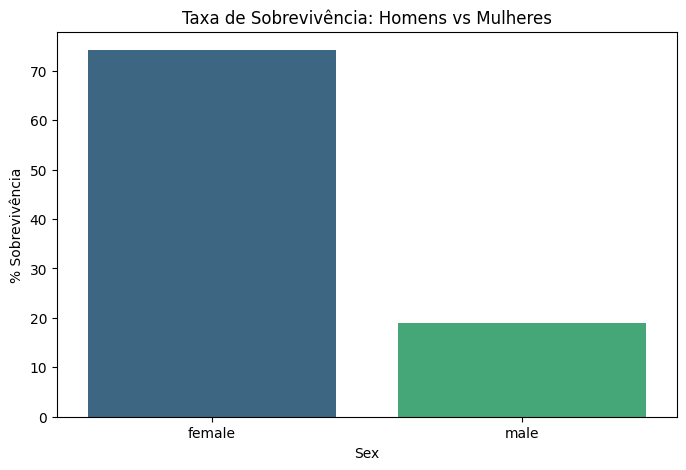

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Biblioteca de gráficos bonita (instale com: pip install seaborn)

# 1. Carregando dados REAIS da nuvem (Raw GitHub URL)
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# 2. O Choque de Realidade
# Olhe a coluna 'Age' e 'Cabin'. Você verá "NaN" (Not a Number).
# Isso quebraria qualquer cálculo em C# sem tratamento.

print("--- Dados Originais ---")
display(df)

print("--- Dados Sujos (Linhas com Nulos) ---")
display(df.isnull().sum()) 

# 3. Limpeza de Dados (Data Cleaning)
# Regra de Negócio: Se não sabemos a idade, vamos preencher com a MÉDIA das idades (Imputation)
media_idade = df['Age'].mean()
df['Age'] = df['Age'].fillna(media_idade)

# Regra de Negócio: A coluna 'Cabin' tem muitos nulos, vamos jogar fora.
df = df.drop(columns=['Cabin'])

print("--- Dados Após preencher Idade com Média ---")
display(df)


# 4. Análise Exploratória (Respondendo Perguntas Reais)
# "Mulheres sobreviveram mais que homens?"
# Survived: 0 = Morreu, 1 = Viveu
sobrevivencia_sexo = df.groupby('Sex')['Survived'].mean() * 100

print("\n--- Taxa de Sobrevivência por Sexo (%) ---")
display(sobrevivencia_sexo)

# 5. Visualização Profissional
plt.figure(figsize=(8, 5))
sns.barplot(x=sobrevivencia_sexo.index, y=sobrevivencia_sexo.values, hue = sobrevivencia_sexo.index, palette='viridis')
plt.title("Taxa de Sobrevivência: Homens vs Mulheres")
plt.ylabel("% Sobrevivência")
plt.show()


--- Taxa de Mortalidade por classe (%) ---


Pclass
1    37.037037
2    52.717391
3    75.763747
Name: Survived, dtype: float64

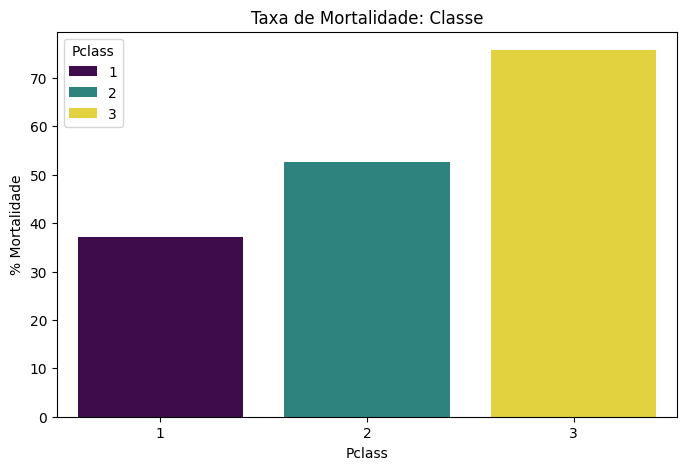

In [2]:
sobrevivencia_classe = df.groupby('Pclass')['Survived'].mean() 

mortalidade_classe = (1 - sobrevivencia_classe) * 100

print("\n--- Taxa de Mortalidade por classe (%) ---")
display(mortalidade_classe)

# 5. Visualização Profissional
plt.figure(figsize=(8, 5))
sns.barplot(x=mortalidade_classe.index, y=mortalidade_classe.values, hue=mortalidade_classe.index, palette='viridis')
plt.title("Taxa de Mortalidade: Classe")
plt.ylabel("% Mortalidade")
plt.show()

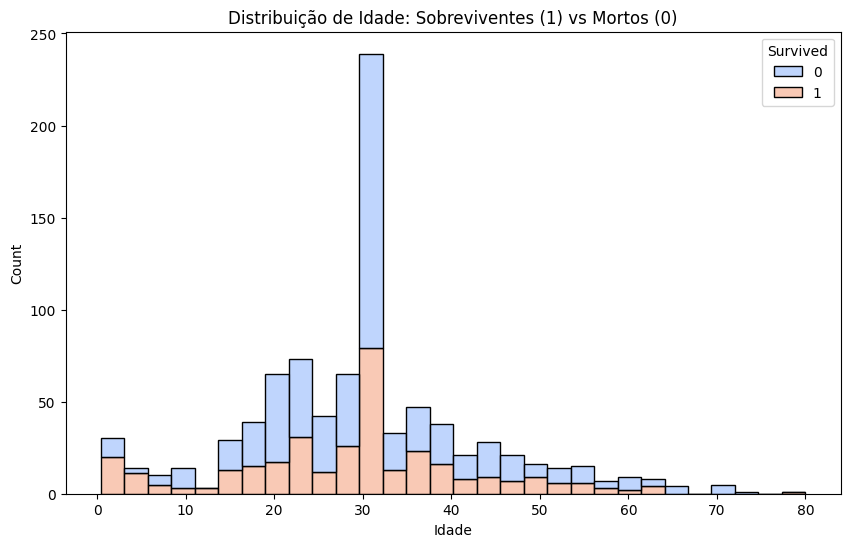

In [3]:
plt.figure(figsize=(10, 6))
# Plotando duas distribuições na mesma imagem
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', palette='coolwarm')
plt.title("Distribuição de Idade: Sobreviventes (1) vs Mortos (0)")
plt.xlabel("Idade")
plt.show()